<img src="./logo_UTN.svg" align="right" width="150" /> 

#### Procesamiento Digital de Señales

# Tarea Semanal Nº2
#### Tobías Guerrero

## 1. Introducción

Para este trabajo semanal, se pide desarrollar una función que calcule la transformada de Fourier discreta de una señal dada.

La transformada de Fourier discreta de una señal viene dada por:

$\begin{equation} 
X_{k} = \sum_{k=1}^{N}x_{n} \cdot e^{-j \cdot 2 \pi \cdot k \cdot n / N}
\end{equation}$

Donde: 
- x es la señal en el dominio del tiempo
- N es el número de muestras de la señal x
- n es el número de muestra actual
- k es la frecuencia discreta

Para realizar este trabajo, primero se aplicará la fórmula, calculando la sumatoria mediante bucles. Luego, se investigará cómo resolverlo de forma más eficiente utilizando las funciones de la librería numpy.

Una vez desarrollada la función, se la probará con disintas señales, con ayuda de la función desarrollada en la tarea semanal N°1.

Además, se compararán los resultados obtenidos con el de la función de numpy fft, que calcula la transformada de Fourier rápida.

## 2. Desarrollo de la función con bucles for

In [6]:
# Librerías
import matplotlib.pyplot as plt
import numpy as np

# Función
def miDFT( x ):
    
    y = np.zeros(len(x),complex)
    
    for k in range(len(x)): # Con el bucle exterior se va cambiando la frecuencia discreta
        for i in range(len(x)): # Con el bucle interior se calcula el valor de la DFT en la frecuencia actual
            y[k] += x[i] * np.exp(-2j * np.pi * k * i / len(x)) # Se utiliza la fórmula descrita anteriormente
    
    y = np.divide(y,len(y)) # Se divide el resultado por el largo del array para escalar el valor obtenido
    
    return y

Para probar la función desarrollada, se calculará la DFT de una función seno con ayuda de la función desarrollada en la tarea semanal N°1, la cual se repite a continuación.

In [7]:
def mifuncion( modo = "seno" , vmax = 1 , dc = 0 , ff = 1 , ph = 0 , nn = 1000 , fs = 1000 ):
    x = np.linspace(0 , nn/fs , nn) # Genero el array de tiempo
    if modo == "seno":
        y = dc + vmax * np.sin(2*np.pi*ff*x + ph) # Para generar la función senoidal utilizo la función provista por numpy
    elif modo == "cuadrada":
        y = dc + vmax * np.sign(np.sin(2*np.pi*ff*x + ph)) # Para generar una función cuadrada tomo el signo de la función seno
    elif modo == "diente":
        y = dc + 2 * vmax * (x * ff%1) - vmax # Para generar una función diente de sierra utilizo la fórmula de la recta que la representa. Al eje x lo escalo por la frecuencia para que se repita las veces que corresponda
    elif modo == "triangular":
        y = dc + 2 * vmax * (1 - np.abs((x * ff%1) - 0.5) * 2) - vmax ## Para generar una función triangular utilizo la fórmula que la representa. Al eje x lo escalo por la frecuencia para que se repita las veces que corresponda
    return x,y

Text(0.5, 1.0, 'DFT calculada')

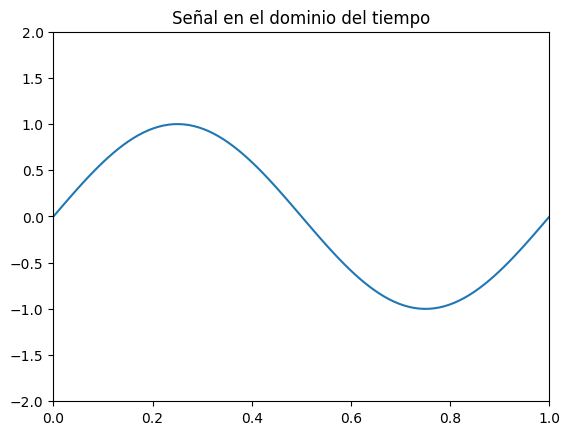

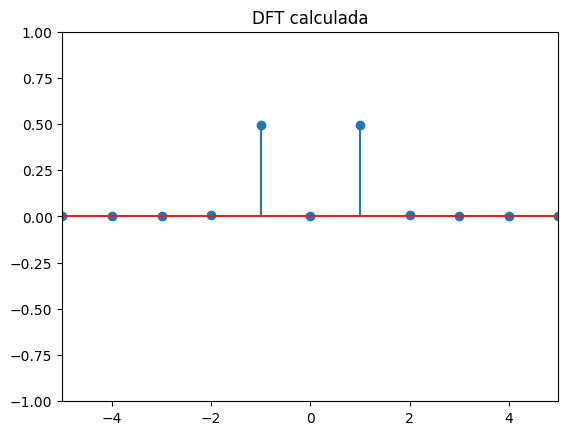

In [8]:
N = 100
fs = 100
frec = 1

x , y = mifuncion("seno",1,0,frec,0,N,fs)

Y = miDFT(y)

f = np.fft.fftfreq(N,1/fs) # Con ayuda de la función fftfreq, se obtiene el eje de frecuencias

plt.plot( x , y ) # Se grafica la función en el dominio del tiempo
plt.xlim(0,1)
plt.ylim(-2,2)
plt.title("Señal en el dominio del tiempo")

plt.figure()
plt.stem( f , np.abs(Y) )
plt.xlim(-5,5)
plt.ylim(-1,1)
plt.title("DFT calculada")

Text(0.5, 1.0, 'FFT obtenida con Numpy')

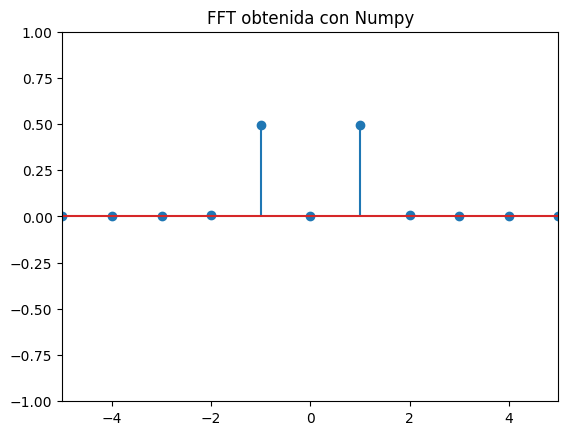

In [9]:
fft = np.fft.fft(y)
fft = np.divide(fft,len(fft))

plt.figure()
plt.stem( f, np.abs(fft) )
plt.xlim(-5,5)
plt.ylim(-1,1)
plt.title("FFT obtenida con Numpy")

Se observa que la DFT calculada es coherente con lo que se espera del espectro de una señal senoidal: un delta de Kronecker en la frecuencia de la senoidal. Además, coincide con la obtenida mediante la FFT.

## 3. Desarrollo sin bucles

Para implementar la misma función sin utilizar bucles, se hará uso del concepto de producto escalar o interno. 

La DFT para una frecuencia discreta dada puede pensarse como el producto escalar entre la señal discreta a analizar y un vector conteniendo los factores correspondientes a la exponencial para esa frecuencia. Con esto en mente, puede plantearse una matriz, cuyas filas sean vectores de todos los factores para cada frecuencia, y luego realizar la operación con ayuda de la función de numpy dot.

Luego de implementarlo, se realiza lo mismo que en 2. para comprobar que funciona de la misma forma.

In [10]:
# Función
def miDFT2( x ):
    
    n = np.arange(len(x))
    
    k = n.reshape((len(x),1))
    
    e = np.exp(-2j * np.pi * n * k/ len(x))
    
    y = np.dot(x , e)
    
    y = np.divide(y,len(y))
    
    return y

Text(0.5, 1.0, 'FFT obtenida con Numpy')

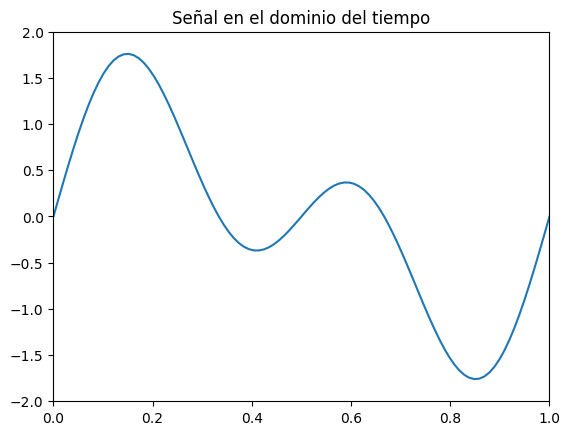

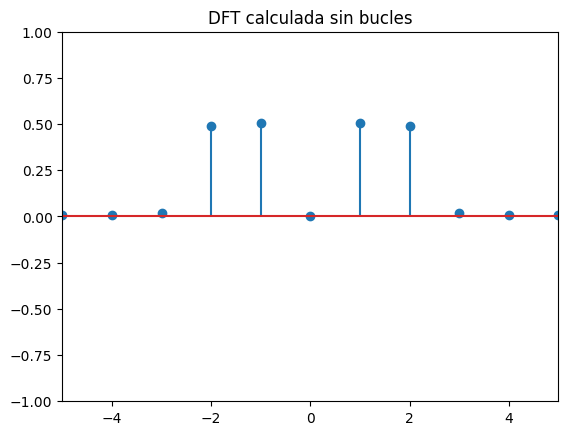

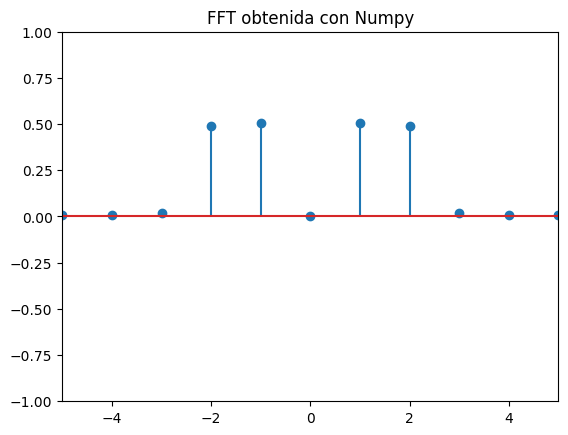

In [15]:
Y = miDFT2(y)

f = np.fft.fftfreq(N,1/fs) # Con ayuda de la función fftfreq, se obtiene el eje de frecuencias

fft = np.fft.fft(y)
fft = np.divide(fft,len(fft))

plt.plot( x , y ) # Se grafica la función en el dominio del tiempo
plt.xlim(0,1)
plt.ylim(-2,2)
plt.title("Señal en el dominio del tiempo")

plt.figure()
plt.stem( f , np.abs(Y) )
plt.xlim(-5,5)
plt.ylim(-1,1)
plt.title("DFT calculada sin bucles")

plt.figure()
plt.stem( f, np.abs(fft) )
plt.xlim(-5,5)
plt.ylim(-1,1)
plt.title("FFT obtenida con Numpy")

A continuación, se utilizará esta implementación para las siguientes pruebas. Además, se comparará en cada caso con la FFT.

## 4. Doble tono

A continuación, se evaluará el comportamiento de la función que calcula la DFT al darle como argumento una funcion con dos tonos senoidales.

Text(0.5, 1.0, 'FFT obtenida con Numpy')

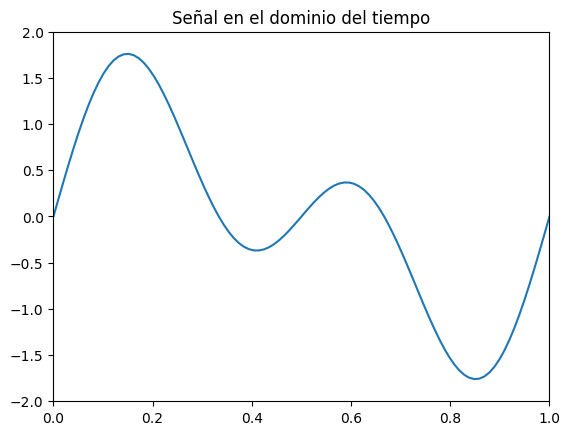

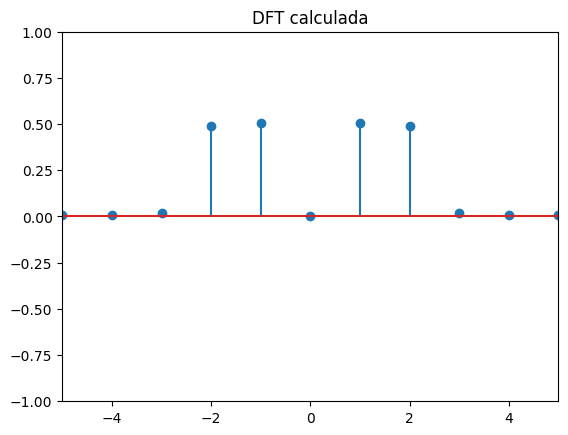

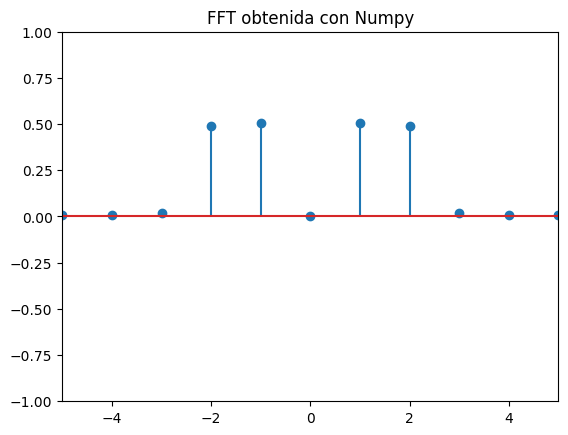

In [14]:
frec = 2

x , y1 = mifuncion("seno",1,0,frec,0,N,fs)

y += y1

Y = miDFT2(y)

fft = np.fft.fft(y)
fft = np.divide(fft,len(fft))

plt.plot( x , y ) # Se grafica la función en el dominio del tiempo
plt.xlim(0,1)
plt.ylim(-2,2)
plt.title("Señal en el dominio del tiempo")

plt.figure()
plt.stem( f , np.abs(Y) )
plt.xlim(-5,5)
plt.ylim(-1,1)
plt.title("DFT calculada")

plt.figure()
plt.stem( f, np.abs(fft) )
plt.xlim(-5,5)
plt.ylim(-1,1)
plt.title("FFT obtenida con Numpy")

Se observa que la amplitud de ambas deltas, correspondientes a cada una de las frecuencias de la señal, es ligeramente distinta. Además, se observa un valor distinto a cero para la frecuencia inmediatamente distinta.

# 5. Señal cuadrada

Text(0.5, 1.0, 'FFT obtenida con Numpy')

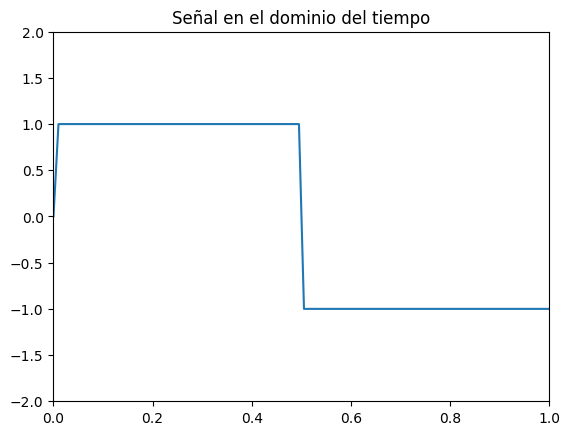

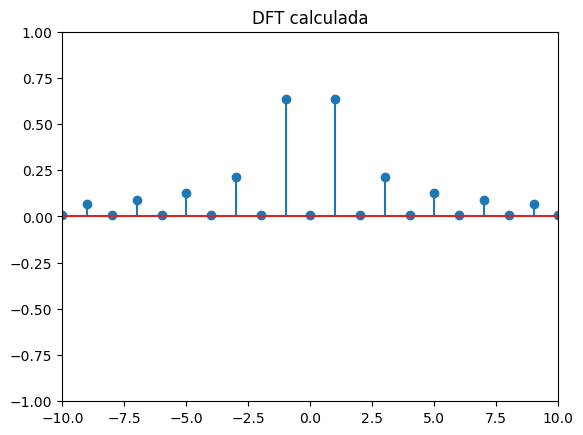

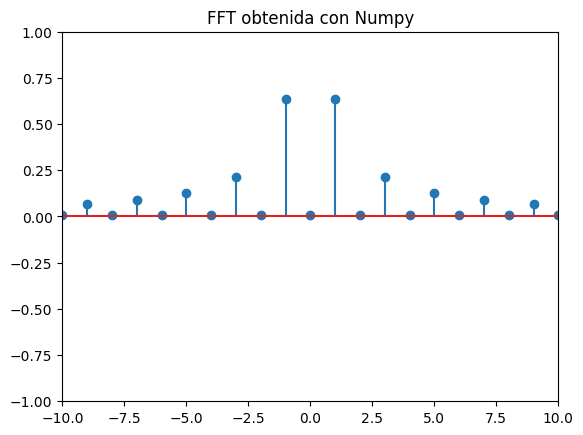

In [17]:
frec = 1

x , y = mifuncion("cuadrada",1,0,frec,0,N,fs)

Y = miDFT2(y)

f = np.fft.fftfreq(N,1/fs) # Con ayuda de la función fftfreq, se obtiene el eje de frecuencias

fft = np.fft.fft(y)
fft = np.divide(fft,len(fft))

plt.plot( x , y ) # Se grafica la función en el dominio del tiempo
plt.xlim(0,1)
plt.ylim(-2,2)
plt.title("Señal en el dominio del tiempo")

plt.figure()
plt.stem( f , np.abs(Y) )
plt.xlim(-10,10)
plt.ylim(-1,1)
plt.title("DFT calculada")

plt.figure()
plt.stem( f, np.abs(fft) )
plt.xlim(-10,10)
plt.ylim(-1,1)
plt.title("FFT obtenida con Numpy")

Como era esperado, se observan armónicas impares.

## 6. Señal Diente de sierra

Text(0.5, 1.0, 'FFT obtenida con Numpy')

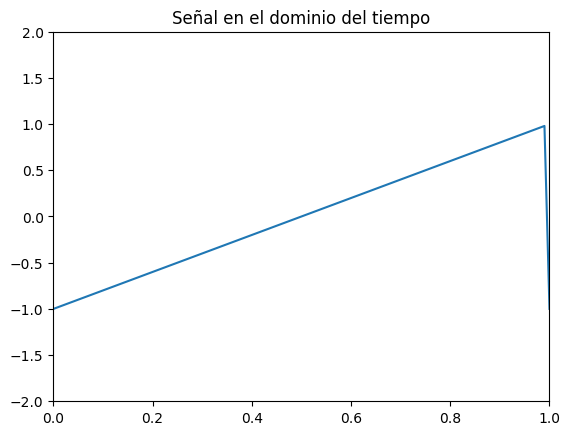

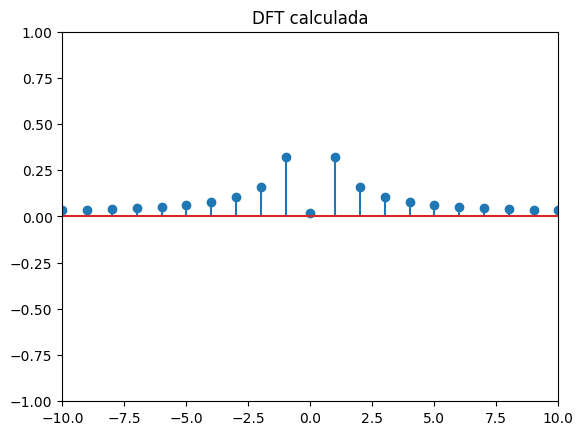

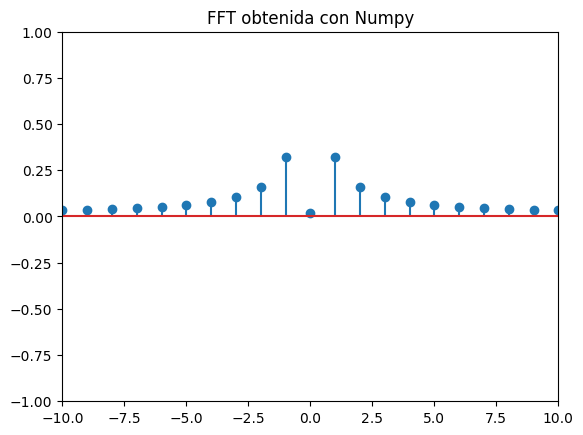

In [18]:
x , y = mifuncion("diente",1,0,frec,0,N,fs)

Y = miDFT(y)

f = np.fft.fftfreq(N,1/fs) # Con ayuda de la función fftfreq, se obtiene el eje de frecuencias

fft = np.fft.fft(y)
fft = np.divide(fft,len(fft))

plt.plot( x , y ) # Se grafica la función en el dominio del tiempo
plt.xlim(0,1)
plt.ylim(-2,2)
plt.title("Señal en el dominio del tiempo")

plt.figure()
plt.stem( f , np.abs(Y) )
plt.xlim(-10,10)
plt.ylim(-1,1)
plt.title("DFT calculada")

plt.figure()
plt.stem( f, np.abs(fft) )
plt.xlim(-10,10)
plt.ylim(-1,1)
plt.title("FFT obtenida con Numpy")

## 7. Señal Triangular

Text(0.5, 1.0, 'FFT obtenida con Numpy')

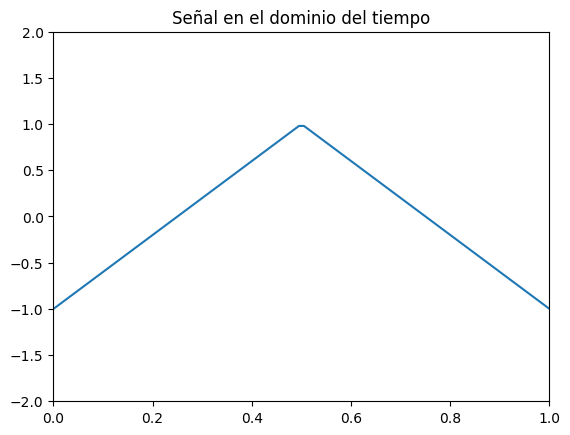

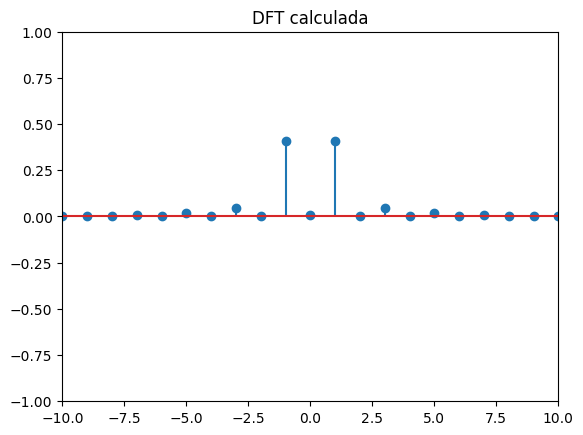

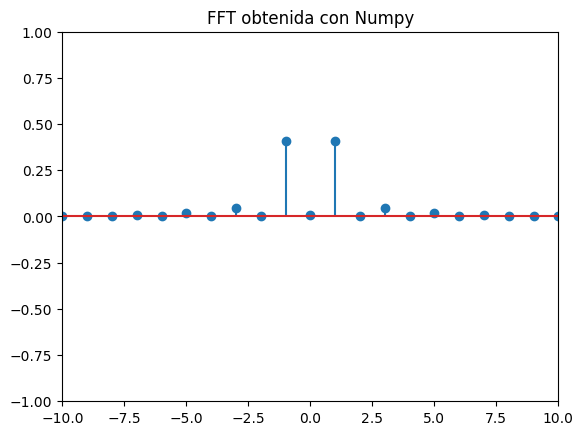

In [19]:
x , y = mifuncion("triangular",1,0,frec,0,N,fs)

Y = miDFT(y)

f = np.fft.fftfreq(N,1/fs) # Con ayuda de la función fftfreq, se obtiene el eje de frecuencias

fft = np.fft.fft(y)
fft = np.divide(fft,len(fft))

plt.plot( x , y ) # Se grafica la función en el dominio del tiempo
plt.xlim(0,1)
plt.ylim(-2,2)
plt.title("Señal en el dominio del tiempo")

plt.figure()
plt.stem( f , np.abs(Y) )
plt.xlim(-10,10)
plt.ylim(-1,1)
plt.title("DFT calculada")

plt.figure()
plt.stem( f, np.abs(fft) )
plt.xlim(-10,10)
plt.ylim(-1,1)
plt.title("FFT obtenida con Numpy")

## 8. Señal Aleatoria

En esta sección, se planteará una señal aleatoria nuevamente con ayuda de la librería numpy. Este ensayo, además de realizar otra prueba a la función desarrollada, servirá para evaluar el espectro de una señal aleatoria, lo cual puede utilizarse como modelo de ruido.

Text(0.5, 1.0, 'FFT obtenida con Numpy')

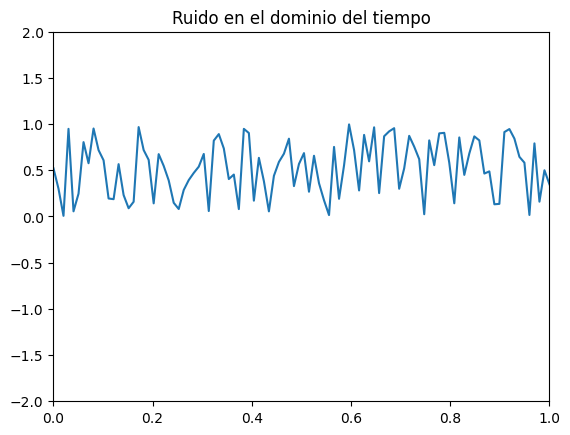

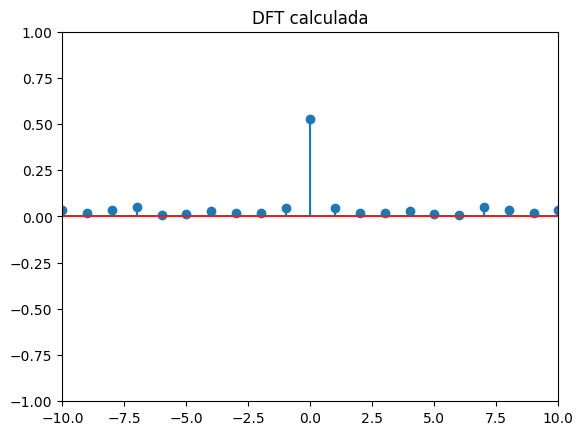

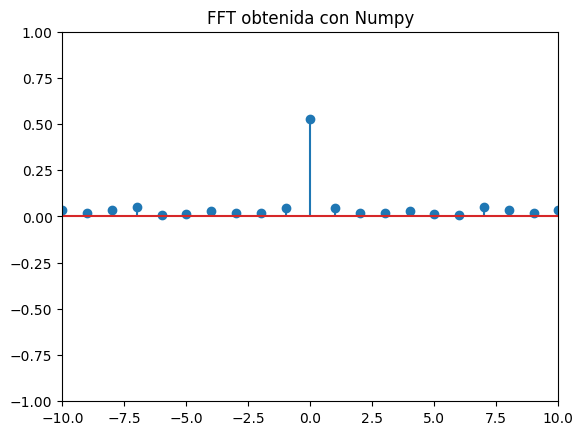

In [24]:
r = np.random.random_sample(len(x))

R = miDFT2(r)

f = np.fft.fftfreq(N,1/fs) # Con ayuda de la función fftfreq, se obtiene el eje de frecuencias

fft = np.fft.fft(r)
fft = np.divide(fft,len(fft))

plt.plot( x , r ) # Se grafica la función en el dominio del tiempo
plt.xlim(0,1)
plt.ylim(-2,2)
plt.title("Ruido en el dominio del tiempo")

plt.figure()
plt.stem( f , np.abs(R) )
plt.xlim(-10,10)
plt.ylim(-1,1)
plt.title("DFT calculada")

plt.figure()
plt.stem( f, np.abs(fft) )
plt.xlim(-10,10)
plt.ylim(-1,1)
plt.title("FFT obtenida con Numpy")

## 9. Conclusiones

A partir del desarrollo de la función, se logró un mejor entendimiento de la transformada de Fourier discreta. Además, se investigó sobre álgebra matricial y como implementarla en Python para mejorar el código inicialmente propuesto. 
Gracias a esto, se logró calcular la DFT de distintos tipos de señales, lo que a su vez integró esta tarea semanal con la anterior.